# Unit 5 - Financial Planning

In [74]:
# By: Ebad Salehi

In [24]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [25]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch and display current BTC price
btc_data = requests.get(btc_url).json()
# print(btc_data)
btc_cad = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(f"Current BTC Price: $ {btc_cad:0.2f}")

Current BTC Price: $ 56164.03


In [6]:
# Fetch and display current ETH price
eth_data = requests.get(eth_url).json()
# print(eth_data)
eth_cad = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"Current ETH Price: $ {eth_cad:0.2f}")

Current ETH Price: $ 3994.11


In [7]:
# Compute current value of my_btc_value and my_eth_value
my_btc_value = btc_cad * my_btc
my_eth_value = eth_cad * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $67396.83
The current value of your 5.3 ETH is $21168.77


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg, my_spy = 200, 50

In [26]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#checking the keys
type(alpaca_api_key)
#type(alpaca_secret_key)

str

In [37]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [38]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-01-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [51]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000,
).df

# Preview DataFrame
df_tickers.head(-5)

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   
...                           ...      ...       ...      ...      ...   
2021-04-19 00:00:00-04:00  114.00  114.500  114.0000  114.440  4820664   
2021-04-20 00:00:00-04:00  114.42  114.670  114.3900  114.620  3674209   
2021-04-21 00:00:00-04:00  114.60  114.740  114.5300  114.740  5250384   
2021-04-22 00:00:00-04:00  114.74  114.800  114.5900  114.770  3518947   
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.750  3506457   

                              SPY                                        
                             open      high     low    close     volume  
time                                                                     
2017-05-11 00:00:00-04:00  239.35  239.5700  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.2100  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.4400  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.6700  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.6400  235.75  235.850  118613594  
...                           ...       ...     ...      ...        ...  
2021-04-19 00:00:00-04:00  416.26  416.7400  413.79  415.240   66226327  
2021-04-20 00:00:00-04:00  413.91  415.0859  410.59  412.220   69715050  
2021-04-21 00:00:00-04:00  411.51  416.2900  411.36  416.080   54772634  
2021-04-22 00:00:00-04:00  415.88  416.7800  411.13  412.300   90086341  
2021-04-23 00:00:00-04:00  412.87  418.2500  412.79  416.720   62184753  

[995 rows x 10 columns]

In [40]:
# Pick AGG and SPY close prices
agg_close_price = df_tickers["AGG"]["close"][-1]
spy_close_price = df_tickers["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.81
Current SPY closing price: $441.92


In [41]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22096.00
The current value of your 200 AGG shares is $22362.00


In [42]:
# computing the current value of my portfolio's AGG and SPY value
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22096.00
The current value of your 200 AGG shares is $22362.00


### Savings Health Analysis

In [43]:
# Set monthly household income
monthly_income = 12000

# calculating total values of BTC and ETH 
total_eth_value = my_eth * my_eth_value
total_btc_value = my_btc * my_btc_value

# Consolidate financial assets data
shares = my_agg_value + my_spy_value
crypto = total_btc_value + total_eth_value

#checking
print(f"Total portfolio Crypto amount = ${crypto:0.2f}")
print(f"Total portfolio Shares amount = ${shares:0.2f}")

Total portfolio Crypto amount = $193070.70
Total portfolio Shares amount = $44458.00


In [44]:
# Create savings DataFrame
savings_data=[my_spy_value + my_agg_value, my_btc_value + my_eth_value]
#savings_data

# Display savings DataFrame
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["shares", "crypto"])
display(savings_df)

,amount
shares,44458.000000
crypto,88565.608635


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

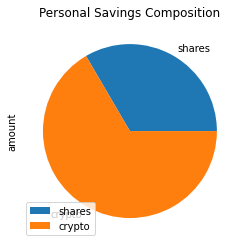

In [80]:
# Plot savings pie chart
savings_df.plot.pie(y="amount", title="Personal Savings Composition")
#savings_df.plot.pie.legend(loc="upper left")


In [46]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#emergency_fund

# Calculate total amount of savings
total_savings = savings_df.sum()[0]
#total_savings

# Validate saving health
if (total_savings > emergency_fund):
    print("Your Savings Are Healthy!")
elif (total_savings == emergency_funds):
    print("You Have Reached Your financial Goals!")
elif total_savings < emergency_fund:
    print(f"You Are ${emergency_fund - total_savings} Away From Reaching Your Goal !")

Your Savings Are Healthy!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [47]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [48]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [52]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [53]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [54]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\00FINTECH\Gitlab Clone\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Ebad_Financial_Planning\code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003845,0.999742,1.005960,1.003810,0.989895,1.004529,1.009409,1.002673,0.995349,1.004552,...,1.002250,0.983811,0.988429,1.002554,1.001597,0.996842,1.005106,1.000248,1.000479,0.994985
2,0.994293,0.989763,1.011372,1.016234,0.992775,1.016891,1.008177,1.005945,1.002802,1.001200,...,1.014470,0.985124,0.997139,1.013768,1.011960,0.998174,1.004374,1.002894,0.993631,1.002872
3,0.994020,1.002826,1.022533,1.012280,0.988466,1.019095,1.017167,1.009425,1.005105,0.986470,...,1.022835,0.958950,0.999592,1.015291,1.011533,1.009635,0.999140,0.997172,0.994605,1.013939
4,0.993450,0.989638,1.017115,1.001207,0.993576,1.027150,1.023367,1.011386,0.997554,0.986953,...,1.015171,0.948286,1.007069,1.010554,1.006897,1.006980,1.007258,1.003400,1.017403,0.998709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,110.321809,33.606881,5.369882,28.369113,13.346929,9.421942,11.267574,33.930772,24.475683,64.910230,...,13.435589,16.717696,15.659436,35.236848,11.177402,16.434487,85.973121,28.318173,7.046282,6.644103
7557,110.976427,33.473308,5.285331,28.069827,13.132834,9.379734,11.047224,33.972078,24.573501,64.930413,...,13.224633,16.628889,15.832169,35.239114,11.055202,16.367166,85.770578,28.443038,7.019575,6.667435
7558,111.807105,33.727421,5.249762,28.002814,13.055447,9.406891,11.012659,34.135863,24.728266,65.073148,...,13.426114,16.419959,15.960137,34.287310,11.013020,16.333965,85.535503,28.543977,6.984898,6.780891
7559,112.592024,33.795611,5.271064,27.840489,13.004650,9.431303,11.056168,33.899211,24.423552,64.415143,...,13.487153,16.229100,16.030982,34.311544,10.997359,16.542189,85.728201,28.856388,7.070375,6.834314


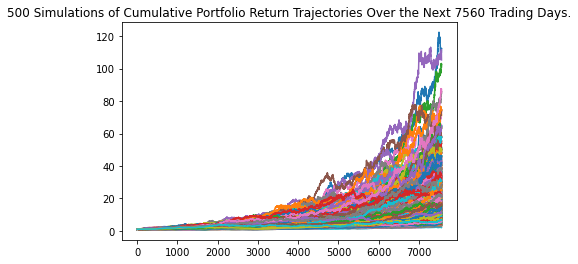

In [55]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

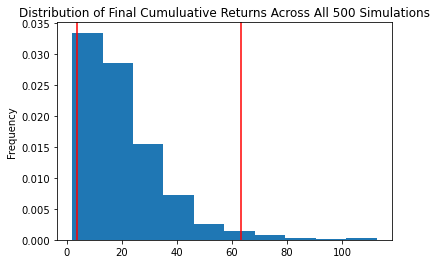

In [56]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
even_tbl

count           500.000000
mean             20.911114
std              15.610493
min               2.023572
25%              10.173045
50%              16.512333
75%              27.995269
max             112.463449
95% CI Lower      3.780443
95% CI Upper     63.351424
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [58]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75608.86 and $1267028.48


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [59]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $113413.29 and $1900542.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [60]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [61]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\00FINTECH\Gitlab Clone\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Ebad_Financial_Planning\code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005760,1.000809,0.993243,1.003619,0.995629,0.997003,1.003062,1.004120,0.993673,1.000984,...,0.987625,1.001972,1.003763,0.996683,1.002900,1.021938,1.000938,1.012647,1.003862,1.000362
2,1.016639,1.005435,0.981172,1.018574,1.003040,1.007340,0.992561,1.010433,0.996739,0.992315,...,1.006533,0.977708,1.009687,1.017863,1.002847,1.017292,0.997944,1.017576,1.012257,0.980128
3,1.030122,1.014202,0.986094,1.015356,1.014820,1.009127,0.992745,0.987790,0.995308,0.987405,...,1.011441,0.965125,1.006226,1.029254,1.020838,1.007037,1.008988,1.017410,1.008547,0.965749
4,1.017185,1.021537,0.976576,1.021839,1.028577,1.019055,0.997361,0.997777,0.996660,0.994716,...,1.025652,0.945005,0.999637,1.047643,1.006600,1.022780,1.010690,1.018322,1.008660,0.982486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.083659,2.850274,2.320991,2.350699,2.963975,1.459797,1.745190,2.175485,1.856774,2.821946,...,1.589833,1.977907,2.462261,1.109247,1.495906,1.697406,2.064612,1.569360,2.325930,1.391696
1257,1.086549,2.831768,2.340818,2.348221,2.928814,1.437513,1.755867,2.173189,1.858145,2.875264,...,1.563382,1.955091,2.482437,1.122968,1.511009,1.713299,2.085862,1.577094,2.305839,1.407892
1258,1.091985,2.775114,2.336999,2.336660,2.969982,1.423608,1.753161,2.146707,1.859363,2.874439,...,1.567784,1.947096,2.497749,1.093824,1.497441,1.722796,2.116508,1.598268,2.333146,1.414676
1259,1.078032,2.806916,2.368268,2.351206,2.961675,1.438325,1.774936,2.174681,1.825002,2.899853,...,1.600032,1.945455,2.516002,1.086516,1.508670,1.745645,2.130525,1.609399,2.327339,1.397581


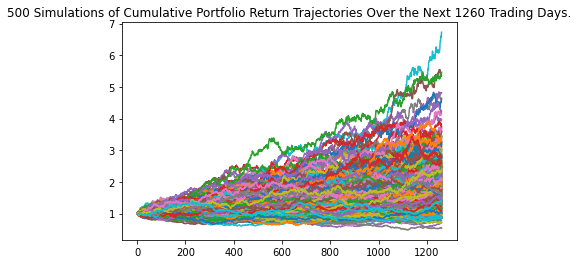

In [63]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

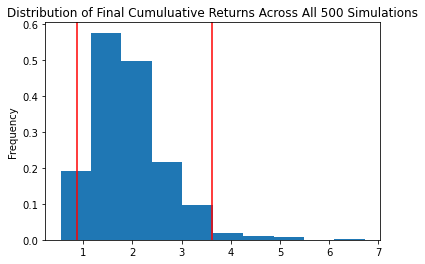

In [64]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()


# Print summary statistics
even_tbl

count           500.000000
mean              1.943038
std               0.760624
min               0.540807
25%               1.415551
50%               1.814358
75%               2.307889
max               6.724501
95% CI Lower      0.878174
95% CI Upper      3.611602
Name: 1260, dtype: float64

In [66]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*initial_investment,2)
ci_upper_five = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52690.42 and $216696.15


### Ten Years Retirement Option

In [67]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [68]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


D:\00FINTECH\Gitlab Clone\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Ebad_Financial_Planning\code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983871,0.994416,0.985388,1.008598,0.999229,1.001686,0.997044,1.005351,1.008461,0.980828,...,0.993447,0.995983,1.009407,1.014547,1.006797,1.001647,1.011823,0.998512,1.008816,0.988514
2,0.983740,0.986122,0.983511,1.012146,0.995232,0.989461,0.995480,1.011620,1.002816,0.984633,...,0.985282,0.996958,1.014972,1.012549,1.005285,0.999149,1.011490,0.998805,1.019375,1.000392
3,0.977753,0.998688,0.982778,1.022845,0.998649,0.988956,0.993288,1.005195,1.007448,0.988964,...,0.981907,1.001786,1.004926,1.017231,1.009061,0.982715,0.998233,1.009980,1.009720,1.001424
4,0.981694,0.998804,0.972747,1.018065,0.992356,0.982461,1.006061,0.999573,1.003033,1.005497,...,0.990931,1.004254,1.020288,0.984941,1.006190,0.972824,1.002453,1.003579,1.016403,0.999038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.574309,6.566555,1.778772,3.423653,4.861934,4.270131,3.614375,1.115672,1.562713,2.910602,...,3.030426,2.642014,1.626127,3.608032,2.296611,5.785647,6.103906,3.223213,2.240403,3.183240
2517,2.601266,6.554029,1.759428,3.381918,4.813214,4.242959,3.589162,1.119217,1.535581,2.865854,...,3.072248,2.619227,1.617360,3.555908,2.315312,5.766020,6.136251,3.266077,2.241774,3.184928
2518,2.569974,6.440356,1.750997,3.405612,4.756217,4.275755,3.619505,1.113966,1.540416,2.870130,...,3.094230,2.567348,1.622732,3.555572,2.292681,5.803615,6.136718,3.230264,2.246308,3.215360
2519,2.594861,6.376204,1.736558,3.437197,4.771176,4.290639,3.608417,1.106017,1.547059,2.848352,...,3.056814,2.533253,1.611418,3.600983,2.297412,5.877587,6.126899,3.264580,2.260728,3.207810


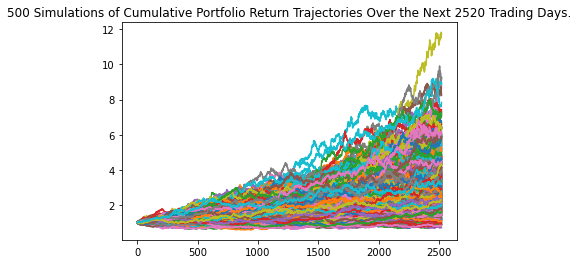

In [69]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

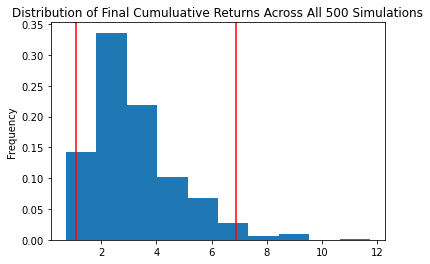

In [70]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
even_tbl

count           500.000000
mean              3.192378
std               1.556921
min               0.726197
25%               2.114452
50%               2.793456
75%               3.911693
max              11.737290
95% CI Lower      1.104876
95% CI Upper      6.882092
Name: 2520, dtype: float64

In [72]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*initial_investment,2)
ci_upper_ten = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66292.58 and $412925.52
